# Вариант 13. Задания 3.1.13, 3.5.4, 3.8.3

## 3.1.13
1. Используя встроенную функцию lu(A) пакета MATHCAD (либо scipy.linalg.lu_factor), получить
LU- разложение матрицы A.
2. Преобразовать вектор b по формулам прямого хода метода Гаусса. С помощью обратной подстановки
найти решение системы x.
УКАЗАНИЕ. Функция lu(A) возвращает матрицу, в которой содержатся матрицы P, L и U такие, что PA=LU
(P- матрица перестановок).
3. n = 5, a_ij = $ 1/(1+c)^3$

In [319]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [320]:
N = 13
n = 5
C = np.ones((n,n))
A = np.ones((n,n))
b = N * np.ones(n)
for i in range(n):
    for j in range(n):
        C[i][j] = 0.1 * N * (i+1) * (j+1)
        A[i][j] = 1/(1+C[i][j])**3

In [321]:
x = np.linalg.solve(A,b)

In [322]:
cond_num = np.linalg.cond(A)

In [323]:
d = np.zeros(n)
for it in range(1,15):
    delta = 10**(-it)
    #print(delta)
    for i in range(n):
        b_i = np.copy(b)
        b_i[i] += delta
        x_i = np.linalg.solve(A,b_i)
        d[i] = np.max(np.abs(x - x_i))/np.max(np.abs(x))
    ind = np.argmax(d)
    delta_x_m = cond_num * delta / b[ind]
    print(str(it) + '.', delta_x_m, d[ind],delta_x_m > d[ind] )

1. 8001769.988508721 0.05166954017572322 True
2. 800176.998850872 0.005166954017573171 True
3. 80017.6998850872 0.0005166954017579812 True
4. 8001.76998850872 5.1669540175736345e-05 True
5. 800.1769988508721 5.166954017341983e-06 True
6. 80.0176998850872 5.16695402290162e-07 True
7. 8.00176998850872 5.166954087764064e-08 True
8. 0.8001769988508721 5.166954551067227e-09 True
9. 0.08001769988508721 5.166956095411104e-10 True
10. 0.008001769988508722 5.1670348569488333e-11 True
11. 0.000800176998850872 5.167374612601784e-12 True
12. 8.00176998850872e-05 5.176640675864071e-13 True
13. 8.00176998850872e-06 5.1272216717985423e-14 True
14. 8.001769988508721e-07 5.714072345076689e-15 True


### Число обусловленности показывает, насколько чувствительна функция к изменениям или ошибкам на входе, и на сколько ошибка на выходе является результатом ошибки на входе. Как правило, если число обусловленности $ \mu (f)=10^k $, то вы можете потерять до k цифр точности сверх того, что будет потеряно для числового значения из-за потери точности из арифметических методов.
### Каждый раз получаем, что практическая погрешность d_m < теоретической погрешности δ(x_m), что соответствует формуле. Т.е. всё нормально. Разберёмся, почему раздичия в d_m и  δ(x_m) настолько большие ( не меньше 8 порядков)
### Поскольку теоретическая ошибка является грубой и учитывает самые плохие ситуации, практическая погрешность может быть значительно меньше, что у нас и получилось. Думаю, что столь большая разница связана с огромным значением числа обусловленности cond_num = 1040230098

## Задача 3.5.4
Дана система уравнений Ax=b порядка n с симметричной положительно определенной матрицей
A. Решить систему методом Холецкого.
 ПОРЯДОК РЕШЕНИЯ ЗАДАЧИ:
1. Используя встроенную функцию cholesky(A) пакета MATHCAD (либо numpy.linalg.cholesky),
получить $LL^T$ - разложение матрицы A.
2. Решить последовательно системы Ly=b и $L^T$x = y с треугольными матрицами.
УКАЗАНИЕ. Функция cholesky(A) возвращает нижнетреугольную матрицу L.

$b_i = m*n - i^3$

In [324]:
n = 50
m = 15
A = np.zeros((n,n))
b = np.zeros(n)
for i in range(1,n+1):
    for j in range(1,n+1):
        if i != j:
            A[i-1][j-1] = (i + j) / (m + n)
        else: A[i-1][j-1] = n + m**2 + j/m + i/n
    b[i-1] = m*n - i**3

In [325]:
L = np.linalg.cholesky(A)
y = np.linalg.solve(L,b)
x = np.linalg.solve(np.transpose(L),y)
np.allclose(np.dot(A,x),b)

True

### Полученные х прошли проверку np.allclose, что говорит о том, что мы верно решили систему

## Задача 3.8.3
Дана система уравнений Az(x)=b(x) порядка n. Построить график функции $ y(x) = \sum_{i=1}^{n} z_i(x)$
на отрезке [a, b]; здесь $z(x) = (z_1(x),z_2(x),...,z_n(x))^T$ - решение системы. Для решения системы
уравнений использовать метод Гаусса (схема полного выбора).

In [326]:
M = 3
q_M = 1.001 - 2 * M * 10**(-3)
n = 30
A = np.zeros((n,n))
for i in range(1,n+1):
    for j in range(1,n+1):
        if i != j:
            A[i-1][j-1] = q_M**(i + j) + 0.1*(j - i)
        else: (q_M - 1) ** (i+j)

In [327]:
def b_i(x,i):
    return x * np.exp(x/i)*np.cos(x/i)

In [328]:
a = 5
x_arr = np.linspace(-a,a,100)
y = []
for x in x_arr:
    b = []
    for i in range(1,n+1):
        b.append(b_i(x,i))
    z = np.linalg.solve(A,b)
    y.append(np.sum(z))

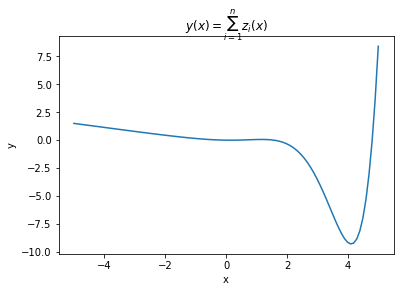

In [329]:
plt.plot(x_arr,y)
plt.title('$ y(x) = \sum_{i=1}^{n} z_i(x)$')
plt.xlabel('x')
plt.ylabel('y');